# About this note book-
this project is for predicting if someone has heart disease or not based on their medical record 


machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing all tools 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import graphviz
from yellowbrick.classifier import classification_report

# Load data

In [4]:
df = pd.read_csv("D:\Machine_learning/MACHINE_LEARN/PROJECTS/Prediction-of-heart-disease-main/data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)


In [5]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [7]:
df["target"].value_counts()
# checking if we have balanced data or not

1    165
0    138
Name: target, dtype: int64

In [8]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot:>

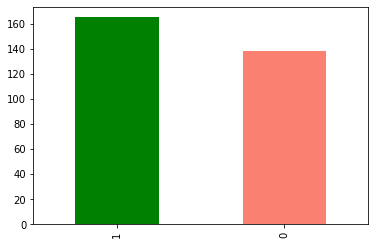

In [9]:
df.target.value_counts().plot(kind="bar",color=["green","salmon"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We dont have any null values

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


#### pd.crosstab is to compare the two values

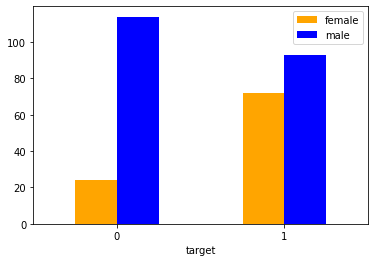

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar",color=["orange","blue"])
plt.legend(["female","male"])
plt.xticks(rotation=0);

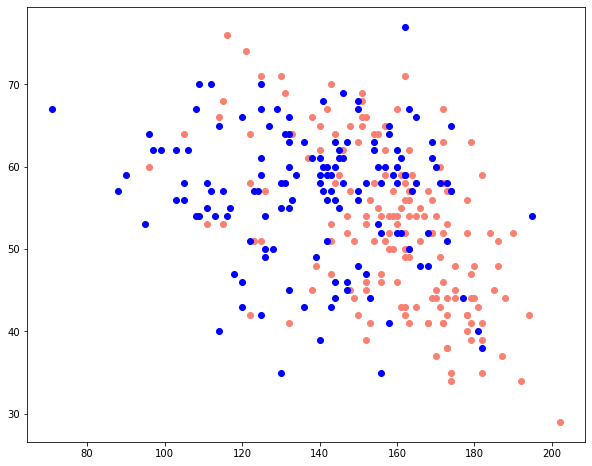

In [15]:
plt.figure(figsize=(10,8))

plt.scatter(df.thalach[df.target==1],
            df.age[df.target==1],
             c= "salmon")
plt.scatter(df.thalach[df.target==0],
            df.age[df.target==0],
             c= "blue")

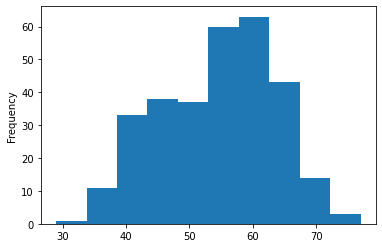

In [16]:
df.age.plot.hist();

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

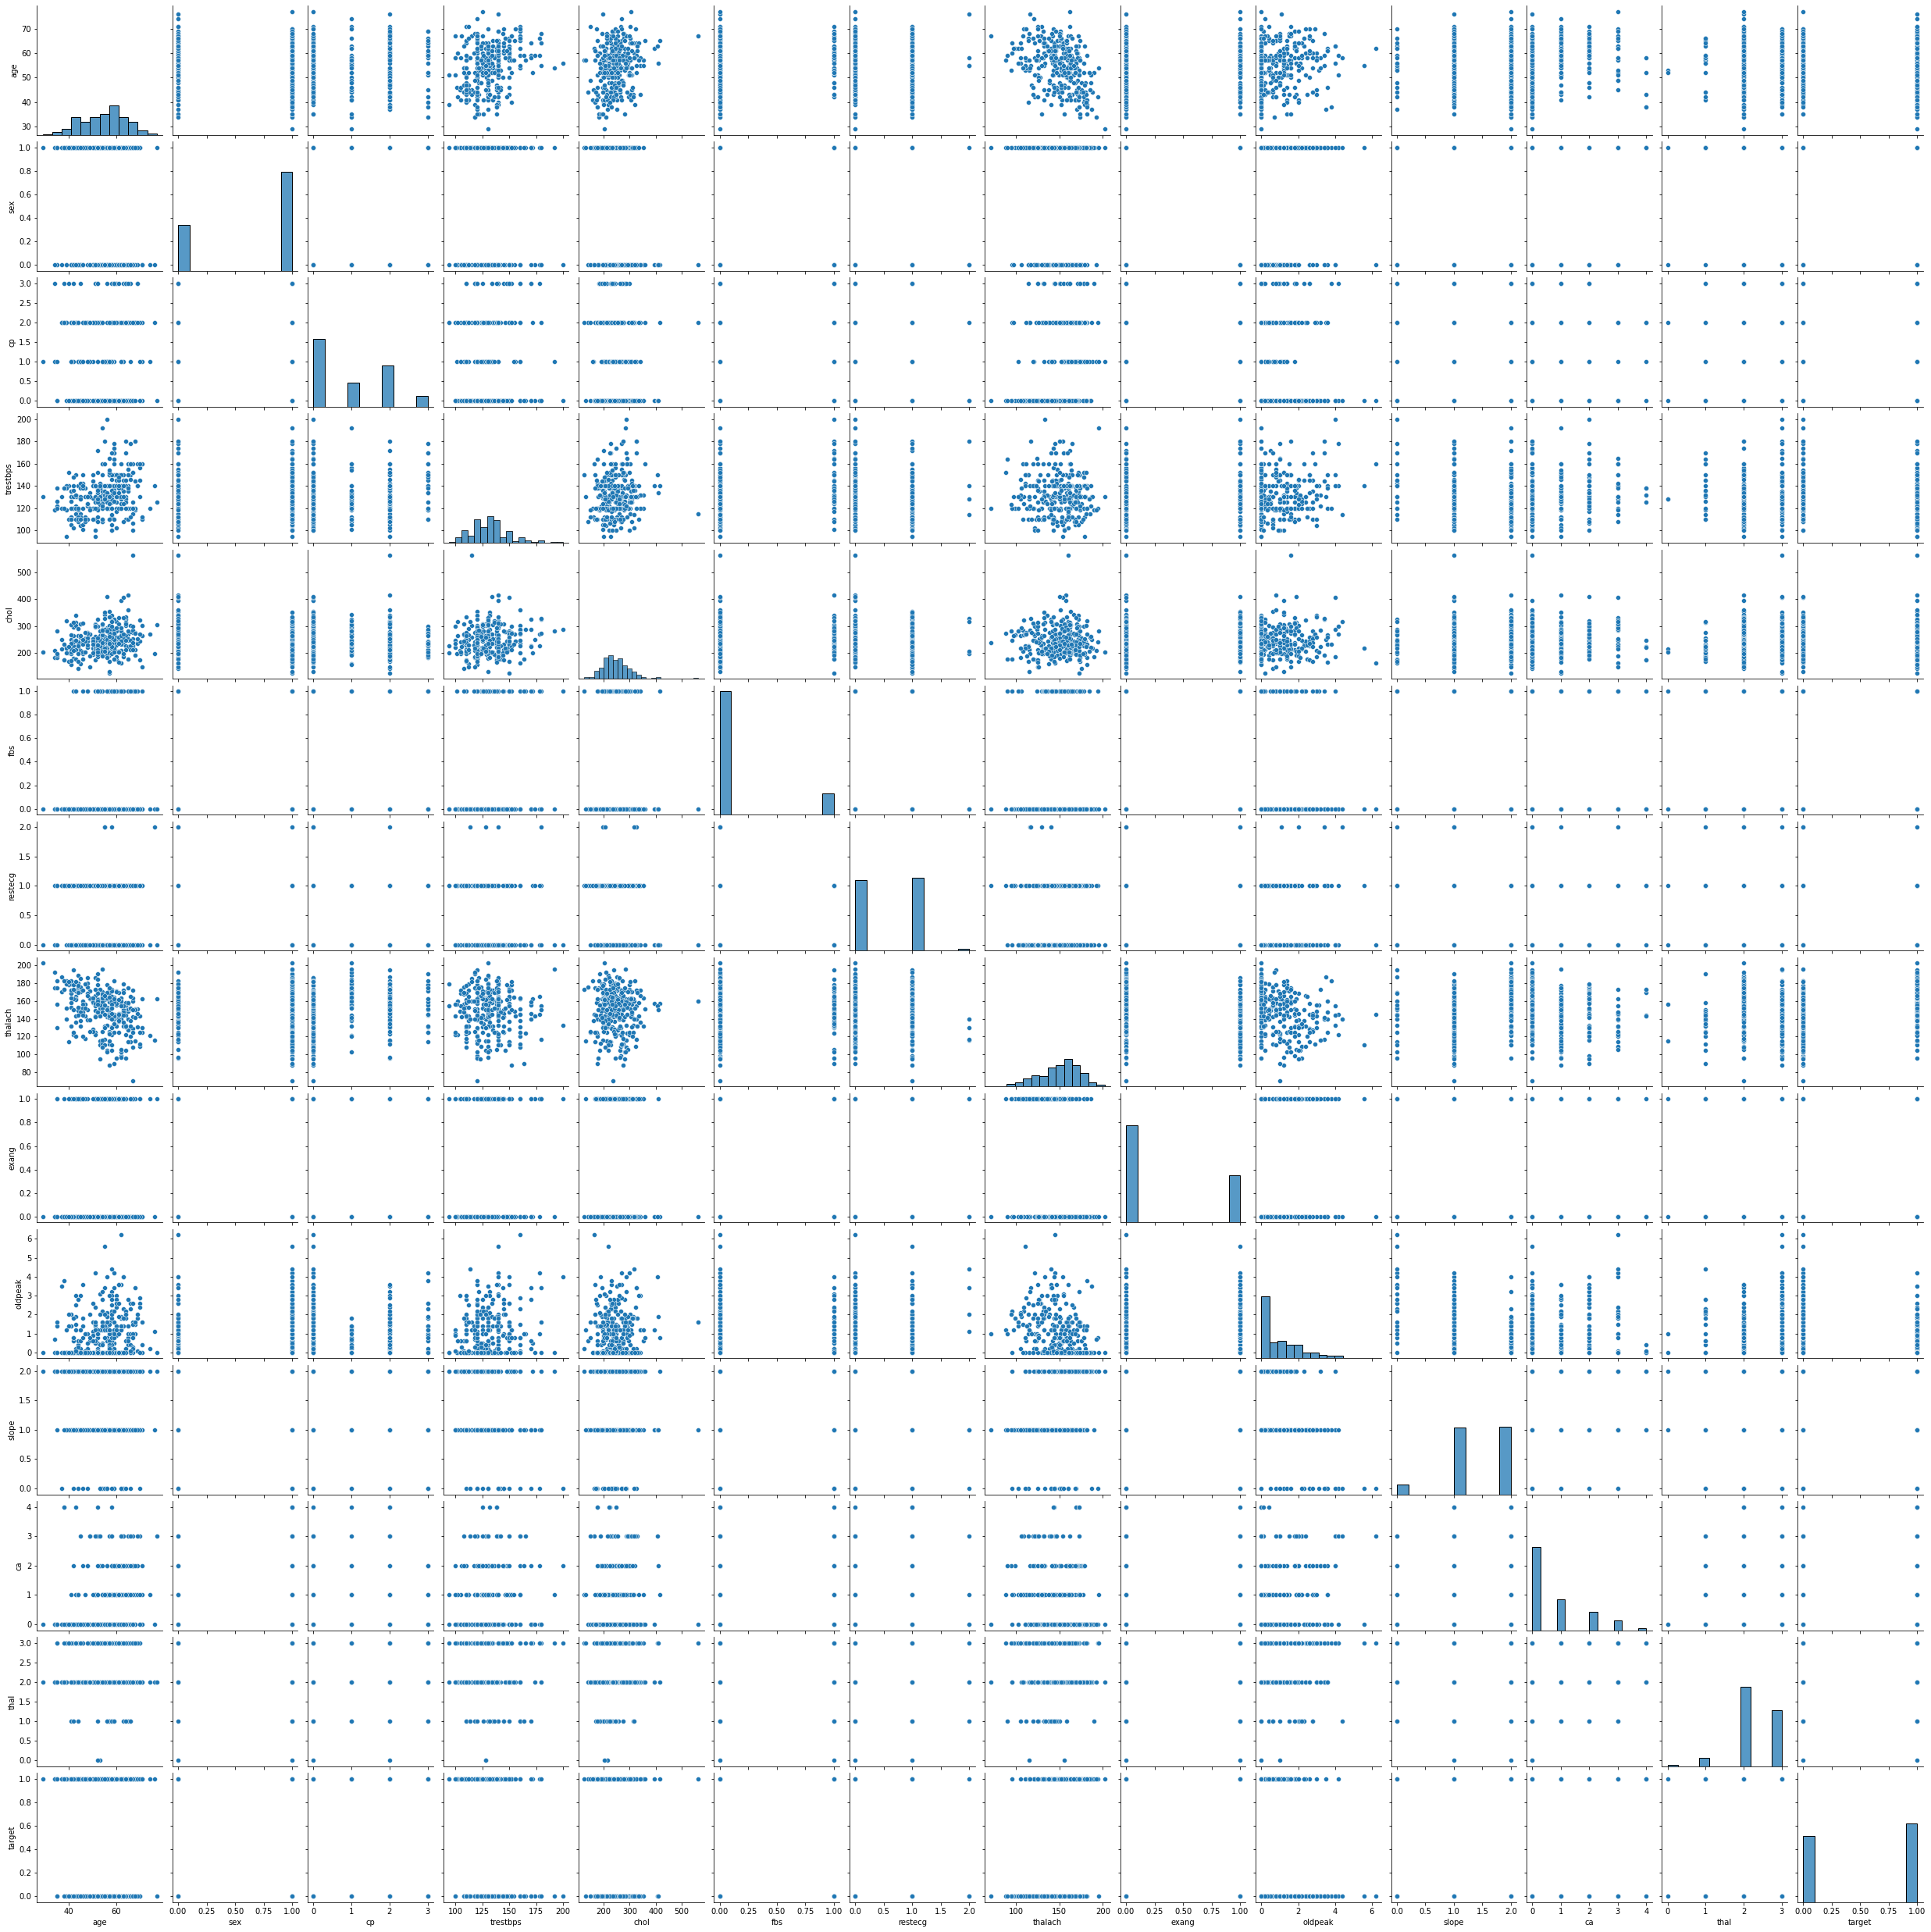

In [19]:
sns.pairplot(df)

In [20]:
df.corr()
# relation between all columns and target if positive that means target incresses the column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


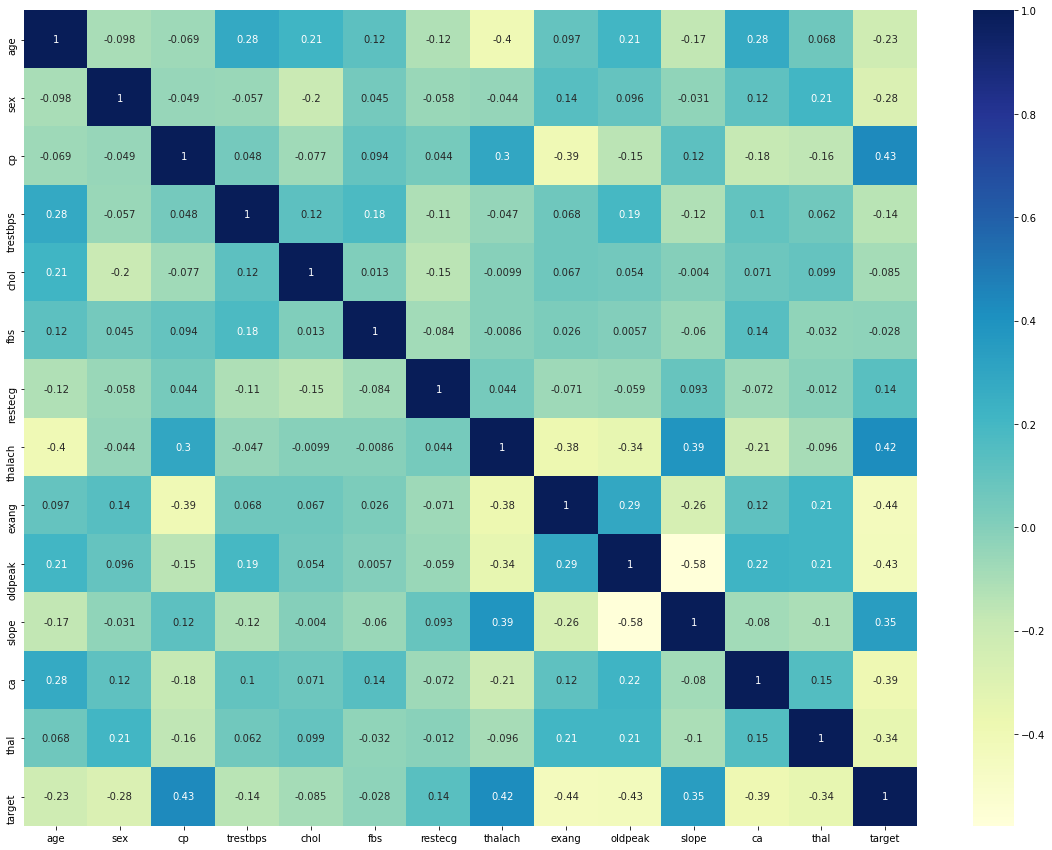

In [21]:
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(20,15))

# annot if true gives values in boxes and cmap for colours which are used below
ax= sns.heatmap(corr_matrix,
                    annot=True,
                   cmap="YlGnBu")

By obseving this map looks like their are no features who are highly corelated

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# splitting data into features and lables 

X = df.drop("target",axis=1)
y = df["target"]

In [24]:
X.head()
len(X)

303

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# now split features and lables into train and split sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3


In [28]:
len(y_train),len(X_train)

(242, 242)

In [29]:
y_train

164    1
302    0
48     1
202    0
115    1
      ..
11     1
142    1
34     1
103    1
272    0
Name: target, Length: 242, dtype: int64

* Now create fuction for fitting and returning score for this three models


We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Adaboost 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Svm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [31]:
model={"random forest": RandomForestClassifier(),
       "Adaboost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
      'svm': svm.SVC()}

In [32]:
def fit_score(model,x_train,x_test,y_train,y_test):
    
    np.random.seed(0)
    
    # make dict for keeping model score
    model_score = {}
    for name, model in model.items():
        model.fit(x_train, y_train)
      
        model_score[name]= model.score(x_test,y_test)
    
    return model_score
    
    

In [33]:
model_scores = fit_score(model=model, x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'random forest': 0.819672131147541,
 'Adaboost': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'svm': 0.639344262295082}

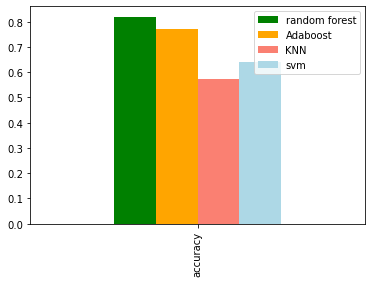

In [34]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar(color=['green','orange', 'salmon','lightblue']);

### KNN hypertunning

In [35]:

kn_train_score=[]
kn_test_score= []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    kn_train_score.append(knn.score(X_train,y_train))
    
    kn_test_score.append(knn.score(X_test, y_test))
        
    

In [36]:
kn_test_score,kn_train_score

([0.5081967213114754,
  0.47540983606557374,
  0.5081967213114754,
  0.5245901639344263,
  0.5737704918032787,
  0.6065573770491803,
  0.6065573770491803,
  0.5737704918032787,
  0.5737704918032787,
  0.5901639344262295,
  0.6065573770491803,
  0.6065573770491803,
  0.5901639344262295,
  0.5573770491803278,
  0.5409836065573771,
  0.5737704918032787,
  0.6229508196721312,
  0.6065573770491803,
  0.5737704918032787,
  0.6229508196721312],
 [1.0,
  0.8099173553719008,
  0.8057851239669421,
  0.8016528925619835,
  0.7892561983471075,
  0.756198347107438,
  0.7520661157024794,
  0.7355371900826446,
  0.7231404958677686,
  0.731404958677686,
  0.7396694214876033,
  0.731404958677686,
  0.7396694214876033,
  0.7272727272727273,
  0.7272727272727273,
  0.7231404958677686,
  0.7272727272727273,
  0.71900826446281,
  0.7272727272727273,
  0.7272727272727273])

Maximum KNN score on the test data: 62.30%


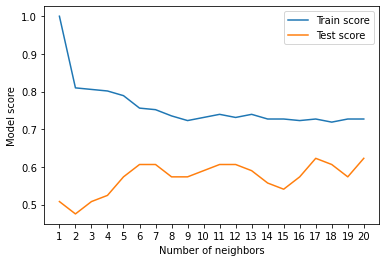

In [37]:
plt.plot(neighbors, kn_train_score, label="Train score")
plt.plot(neighbors, kn_test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(kn_test_score)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* Adaboost
* RandomForestClassifier

... using RandomizedSearchCV

In [38]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [39]:
# Create a hyperparameter grid for Adaboost
adb_params = {
 'n_estimators': [50,100,300,400],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [40]:
adb_model= RandomizedSearchCV(AdaBoostClassifier(),
                                param_distributions=adb_params,
                                n_iter=100,
                                cv=5,
                               verbose=True
                               )
adb_model.fit(X_train,y_train)

D:\Machine_learning\MACHINE_LEARN\M_Learn_ENV\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.7s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100, 300, 400]},
                   verbose=True)

In [41]:
adb_model.best_params_

{'n_estimators': 300, 'learning_rate': 0.3}

In [42]:
adb_model.score(X_test,y_test)

0.819672131147541

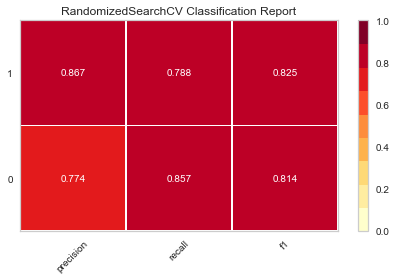

In [84]:
classification_report(adb_model,X_train,y_train,X_test,y_test);

### random forest hypertuning

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

In [ ]:
rs_rf

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test,y_test)

## our randomforest perfomed well so we will do grid search on it

#### we will see how much time it takes to do gridsearch on above dict

In [ ]:
rf_grid = {"n_estimators": np.arange(200, 600, 50),
           "max_depth": [ 3, 5, 10],
           "min_samples_split": np.arange(10, 20, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

In [ ]:
np.random.seed(42)

grid_search_rf = GridSearchCV(RandomForestClassifier(),
                              param_grid = rf_grid,
                              cv = 3,
                              verbose= True)
grid_search_rf.fit(X_train,y_train);

In [ ]:
grid_search_rf.best_params_

In [ ]:
%%time
# Most ideal hyperparameters
rfgrid_model = RandomForestClassifier(n_estimators=250,
                                    max_depth= 10,
                                    min_samples_leaf=1,
                                    min_samples_split=12,
                                    max_features=0.5,
                   
                                      n_jobs=-1,
                                    )
rfgrid_model.fit(X_train, y_train)

In [ ]:
rfgrid_model.score(X_test, y_test)

### Grid search on adaboost

In [43]:
adb_grid = {
 'n_estimators': [150,200,250,300,350,400],
 'learning_rate' : [0.01,0.05,0.1,0.3,0.5],
 }

In [65]:
%%time
abd_grid_model=GridSearchCV(AdaBoostClassifier(random_state=0),
                            param_grid=adb_grid,
                            cv=5,verbose=1,scoring='roc_auc')
                                                  
                                    
abd_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


Wall time: 1min


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'n_estimators': [150, 200, 250, 300, 350, 400]},
             scoring='roc_auc', verbose=1)

In [66]:
abd_grid_model.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [67]:
abd_grid_model.score(X_test,y_test)

0.9155844155844155

### Wooooo thats great we got 91% accuracy

In [47]:
# save model
import pickle
pickle.dump(abd_grid_model,open('D:\Machine_learning/MACHINE_LEARN/PROJECTS/Prediction-of-heart-disease-main/saved_model/grid_adaboost.sva',
                 'wb'))

# load saved model
idel_model = pickle.load(open('D:\Machine_learning/MACHINE_LEARN/PROJECTS/Prediction-of-heart-disease-main/saved_model/grid_adaboost.sva',
                 'rb'))

In [49]:
idel_model.score(X_test,y_test)

0.9155844155844155

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score



In [70]:
y_preds = idel_model.predict(X_test)

In [71]:
y_preds

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

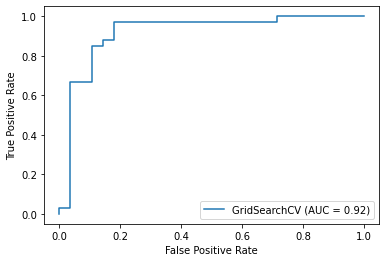

In [74]:
plot_roc_curve(idel_model,X_test, y_test)

In [63]:
confusion_matrix(y_test,y_preds)

array([[23,  5],
       [ 4, 29]], dtype=int64)

### for more visualization of cf-matrix use seaborn

In [75]:
def plot_con_matrix(y_test,y_preds):
    fig,ax = plt.subplots()
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                        annot=True )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    

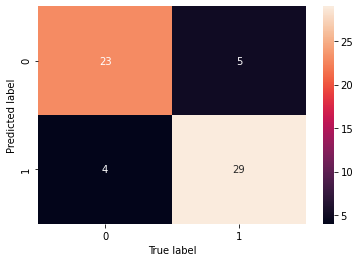

In [76]:
plot_con_matrix(y_test,y_preds)

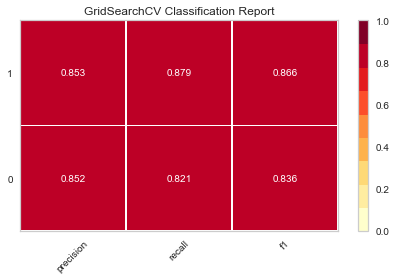

In [83]:
classification_report(idel_model,X_train,y_train,X_test,y_test);